In [14]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_annual_tax(income):
    # Define the tax bands and rates
    personal_allowance = 12570
    basic_rate_limit = 50270
    higher_rate_limit = 125140

    basic_rate = 0.20
    higher_rate = 0.40
    additional_rate = 0.45

    # Calculate income tax
    if income <= personal_allowance:
        tax = 0
    elif income <= basic_rate_limit:
        tax = (income - personal_allowance) * basic_rate
    elif income <= higher_rate_limit:
        tax = (basic_rate_limit - personal_allowance) * basic_rate
        tax += (income - basic_rate_limit) * higher_rate
    else:
        tax = (basic_rate_limit - personal_allowance) * basic_rate
        tax += (higher_rate_limit - basic_rate_limit) * higher_rate
        tax += (income - higher_rate_limit) * additional_rate

    return tax

def calculate_ni_expenses(profits):
    # Define the thresholds and rates for Class 2 and Class 4 NICs
    small_profits_threshold = 12570
    lower_earnings_limit = 12570
    upper_earnings_limit = 50270
    
    class_2_rate = 3.45  # per week
    class_4_lower_rate = 0.06
    class_4_upper_rate = 0.02

    # Calculate Class 2 NICs 
    if profits > small_profits_threshold:
        class_2_ni = 3.45 * 52  # Weekly rate for 52 weeks
    else:
        class_2_ni = 0

    # Calculate Class 4 NICs
    if profits <= lower_earnings_limit:
        class_4_ni = 0
    elif profits <= upper_earnings_limit:
        class_4_ni = (profits - lower_earnings_limit) * class_4_lower_rate
    else:
        class_4_ni = (upper_earnings_limit - lower_earnings_limit) * class_4_lower_rate
        class_4_ni += (profits - upper_earnings_limit) * class_4_upper_rate

    # Total NI contributions
    total_ni = class_4_ni
    return total_ni


def calculate_corporation_tax(profits):
    # Define the thresholds and rates
    lower_threshold = 50000
    upper_threshold = 250000
    lower_rate = 0.19
    upper_rate = 0.25

    if profits <= lower_threshold:
        tax = profits * lower_rate
    elif profits <= upper_threshold:
        # Apply marginal relief calculation
        tax = (profits * upper_rate) - ((upper_threshold - profits) * 0.015)
    else:
        tax = profits * upper_rate

    return tax

# Example usage
profit = 60000  # Replace with the actual profit
ni_expenses = calculate_ni_expenses(profit)
tax = calculate_annual_tax(profit)
total_tax = tax + ni_expenses

corporate_tax = calculate_corporation_tax(profit)

print("tax: {}".format(tax))
print("NI: {}".format(ni_expenses)) # £2,456.60
print("corporate_tax: {}".format(corporate_tax))




tax: 11432.0
NI: 2456.6
corporate_tax: 12150.0


In [15]:
profits = np.linspace(0,300000,500)

tax_st = []
tax_ltd = []

for i in profits:
    tax_st.append(((calculate_ni_expenses(i))+(calculate_annual_tax(i))))
    tax_ltd.append(calculate_corporation_tax(i))


Text(0.5, 1.0, 'Taxation of LTD and ST plot over annual profit')

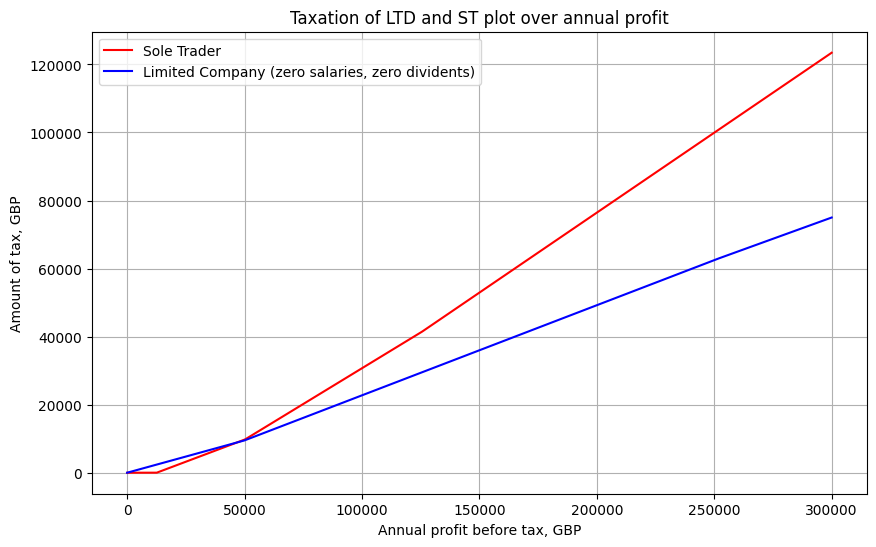

In [22]:
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel("Annual profit before tax, GBP")
plt.ylabel("Amount of tax, GBP")
plt.plot(profits, tax_st, label='Sole Trader', color="red")
plt.plot(profits, tax_ltd, label='Limited Company (zero salaries, zero dividents)', color="blue")
plt.legend()
plt.title("Taxation of LTD and ST plot over annual profit")